In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install bertopic

In [ ]:
!pip install pyvis
!pip install bertopic[flair]
!pip install bertopic[gensim]
!pip install bertopic[spacy]
!pip install bertopic[use]
!pip install spacytextblob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm
!pip install octis

In [5]:
import pandas as pd
import spacy
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from bertopic import BERTopic
from IPython.core.pylabtools import figsize
from pyvis.network import Network
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.dataset.dataset import Dataset


In [6]:
def removing_na(df, COLUMN):
  # remove the rows with NA
  df = df.loc[(df[COLUMN].isna() == False)]
  return df

In [7]:
def preprocessing(df, COLUMN):
  # pre processing
  nlp = spacy.load("en_core_web_sm")
  texts = df[COLUMN]

  processed_texts = [text for text in tqdm(nlp.pipe(texts, 
                                              disable=["ner",
                                                       "parser"]),
                                          total=len(texts))]
  # lemmatizing, removing stop words and panctuation, lowercasing and taking nouns and adjectives
  lemmatized_texts = [[token.lemma_.lower() for token in doc if 
                    not token.is_punct and not token.is_stop and (token.pos_ == 'NOUN' or token.pos_ == 'ADJ')] for doc in processed_texts]
  # remove numbers
  lemmatized_texts = [[re.sub(r'^[0-9]+|^.$', '', word) for word in text] for text in lemmatized_texts]
  # remove empty values
  lemmatized_texts = [[token for token in text if token != ''] for text in lemmatized_texts]
  return lemmatized_texts

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/thesis_datasets/emotion_regulation/emotion_regulation.csv')

In [9]:
df_keywords  = removing_na(df, COLUMN = 'keywords')
df_abstracts  = removing_na(df, COLUMN = 'abstract')

In [10]:
list_keywords = df_keywords['keywords'].to_list()
list_abstracts = df_abstracts['abstract'].to_list()

In [11]:
lemmatized_keywords = preprocessing(df_keywords, COLUMN = 'keywords')
lemmatized_abstracts = preprocessing(df_abstracts, COLUMN = 'abstract')

  0%|          | 0/5031 [00:00<?, ?it/s]

  0%|          | 0/6098 [00:00<?, ?it/s]

In [12]:
allkeywords = []

for wordlist in lemmatized_keywords:
  string = ''
  string = ' '.join([str(item) for item in wordlist])
  allkeywords.append(string)


In [13]:
allabstracts = []

for wordlist in lemmatized_abstracts:
  string = ''
  string = ' '.join([str(item) for item in wordlist])
  allabstracts.append(string)


# **KEYWORDS**

In [14]:
model_keywords = BERTopic(embedding_model="paraphrase-MiniLM-L3-v2",min_topic_size = 15)


In [15]:
topics_keywords, probabilities = model_keywords.fit_transform(allkeywords)

  0%|          | 0.00/63.9M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [16]:
freq_keywords = model_keywords.get_topic_info()
print("Number of topics: {}".format( len(freq_keywords)))
freq_keywords

Number of topics: 100


,Topic,Count,Name
0,-1,836,-1_antisocial_mood_conflict_training
1,0,306,0_middle_universal_actigraphy_elite
2,1,166,1_mental_health_service_care
3,2,151,2_emotion_emotional_problems_parental
4,3,139,3_trauma_stress_ptsd_posttraumatic
...,...,...,...
95,94,17,94_aggression_implicit_defiance_harm
96,95,17,95_early_late_lateral_startle
97,96,17,96_cultural_cross_comparison_israeli
98,97,16,97_adjustment_value_pcit_classification


In [17]:
model_keywords.visualize_topics()

In [18]:
model_keywords.visualize_barchart()

# **ABSTRACTS**

In [19]:
model_abstracts = BERTopic(embedding_model="paraphrase-MiniLM-L3-v2",min_topic_size = 15)
topics_abstracts, probabilities = model_abstracts.fit_transform(allabstracts)

In [20]:
freq_abs = model_abstracts.get_topic_info()
print("Number of topics: {}".format( len(freq_abs)))
freq_abs

Number of topics: 58


,Topic,Count,Name
0,-1,2837,-1_adolescent_problems_study_emotional
1,0,208,0_emotion_regulation_strategy_cognitive
2,1,188,1_mental_health_problems_service
3,2,135,2_autism_spectrum_disorder_asd
4,3,134,3_trauma_ptsd_exposure_symptoms
5,4,131,4_eating_weight_obesity_food
6,5,125,5_suicidal_ideation_self_history
7,6,118,6_stress_stressors_cortisol_reactivity
8,7,107,7_peer_victimization_friend_rejection
9,8,91,8_emotion_mother_regulation_child


In [21]:
model_abstracts.visualize_topics()

In [22]:
model_abstracts.visualize_barchart()

# KEYWORDS COHERENCE AND DIVERSITY





In [23]:
dataset_keywords = Dataset()
dataset_keywords.load_custom_dataset_from_folder("/content/gdrive/MyDrive/thesis_datasets/emotion_regulation/keywords")

In [24]:
all_words = [word for words in dataset_keywords.get_corpus() for word in words]
bertopic_topics = [
    [
        vals[0] if vals[0] in all_words else all_words[0]
        for vals in model_keywords.get_topic(i)[:10]
    ]
    for i in range(len(set(topics_keywords)) - 1)
]

output_keywords = {"topics": bertopic_topics}


In [25]:
npmi_keywords = Coherence(texts=dataset_keywords.get_corpus(), topk=10, measure="c_v")
topic_diversity_keywords= TopicDiversity(topk=10)

In [26]:
npmi_keywords.score(output_keywords)


1.0

In [27]:
topic_diversity_keywords.score(output_keywords)

0.00101010101010101

# ABSTRACTS COHERENCE AND DIVERSITY


In [28]:
dataset_abstracts = Dataset()
dataset_abstracts.load_custom_dataset_from_folder("/content/gdrive/MyDrive/thesis_datasets/emotion_regulation/abstracts")

In [29]:
all_words = [word for words in dataset_abstracts.get_corpus() for word in words]
bertopic_topics = [
    [
        vals[0] if vals[0] in all_words else all_words[0]
        for vals in model_abstracts.get_topic(i)[:10]
    ]
    for i in range(len(set(topics_abstracts)) - 1)
]

output_abstracts = {"topics": bertopic_topics}


In [30]:
npmi_abs = Coherence(texts=dataset_abstracts.get_corpus(), topk=10, measure="c_v")
topic_diversity_abs = TopicDiversity(topk=10)

In [31]:
npmi_abs.score(output_abstracts)

0.9964830440599453

In [32]:
topic_diversity_abs.score(output_abstracts)

0.007017543859649123

# NETWORK

In [33]:
# create df with nodes and edges
def generate_edges(topic2words):
  word2topics = {}
  for key ,values in topic2words.items():
    for value in values:
      if value in word2topics:
        word2topics[value].append(key)
      else:
        word2topics[value] = [key]

  source = []
  target = []
  for topic, words in topic2words.items():
    for word in words:
      for top in word2topics[word]:
        if top != topic:
          source.append(f"{words[0]}\n{words[1]}")
          target_words = topic2words[top]
          target.append(f"{target_words[0]}\n{target_words[1]}")


  df = pd.DataFrame()
  df['source'] = source
  df['target'] = target
  df['weight'] = 1

  return df

In [34]:
def create_dict_top2word(model):  
  topic2words = {}
  for topic in  model.get_topics():
    if topic not in [0, -1]:
      topic2words[topic] = [word[0] for word in model.get_topics()[topic]]
  return topic2words

In [35]:
def df2network(edges_df):
  network = nx.from_pandas_edgelist(edges_df, source = 'source', target = 'target', edge_attr = 'weight',create_using=nx.MultiGraph())
  return network


## KEYWORDS NETWORK

In [45]:
keywords_edges = generate_edges(create_dict_top2word(model_keywords))
keywords_edges.to_csv("BERT_keywords_emotion_network.csv")

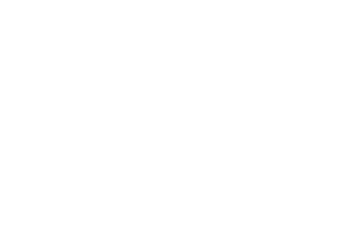

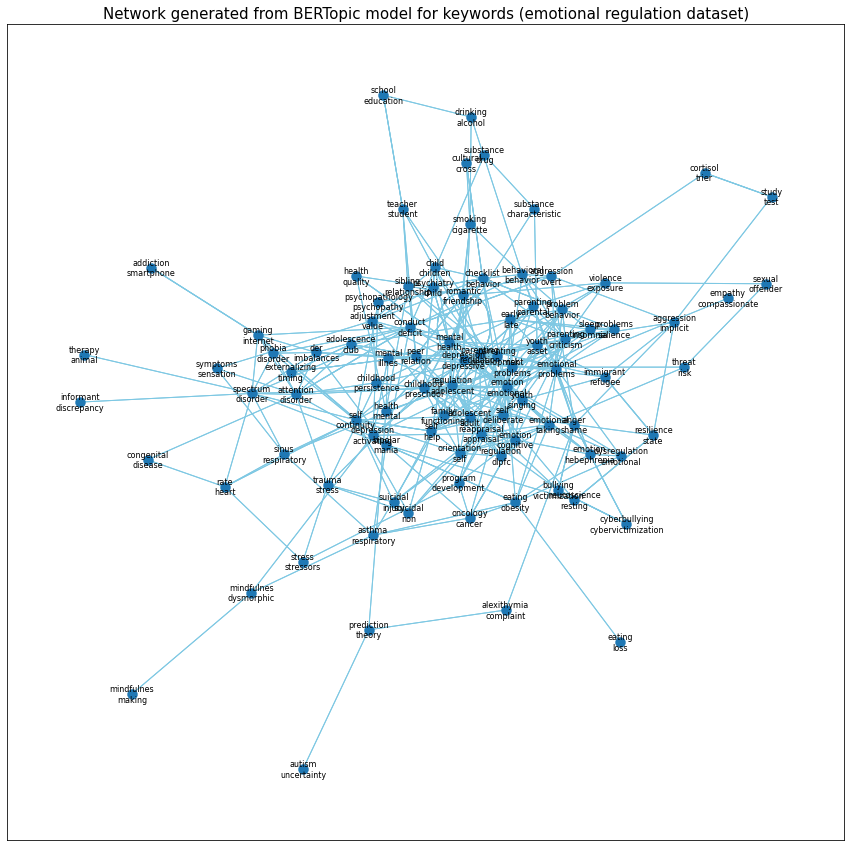

In [46]:
#create plot 2D

limits = plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title('Network generated from BERTopic model for keywords (emotional regulation dataset)', 
             fontdict = {'fontsize': 15})
nx.draw_networkx(df2network(keywords_edges), node_size = 100, ax = ax, 
                 edge_color = '#7EC8E3',  linewidths = 0.4, font_size = 8)

In [38]:
#create interactive plot network
net = Network(notebook=True)

net.from_nx(df2network(keywords_edges))

net.show("BERT_net_keywords_emotions.html")

## ABSTARCTS NETWORK


In [39]:
abstracts_edges = generate_edges(create_dict_top2word(model_abstracts))
abstracts_edges.to_csv("BERT_abstracts_emotion_network_df.csv")

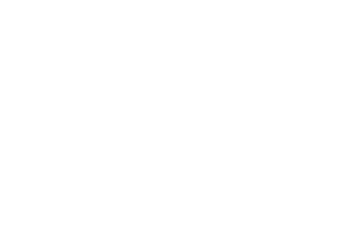

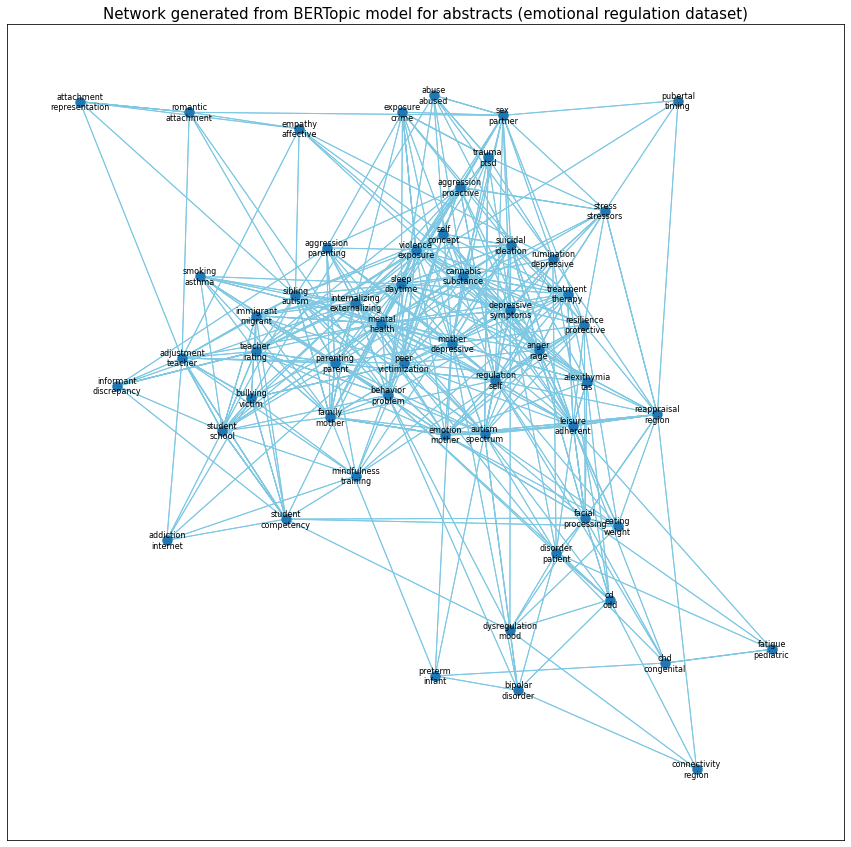

In [42]:
#create plot 2D

limits = plt.axis("off")
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.set_title('Network generated from BERTopic model for abstracts (emotional regulation dataset)', 
             fontdict = {'fontsize': 15})
nx.draw_networkx(df2network(abstracts_edges), node_size = 100, ax = ax, 
                 edge_color = '#7EC8E3',  linewidths = 0.4, font_size = 8)

In [41]:
#create interactive plot network
net = Network(notebook=True)

net.from_nx(df2network(abstracts_edges))

net.show("BERT_net_abstracts_emotions_regulation.html")